# Random Number Dataset Creation

In [57]:
import random
from datetime import datetime
import pandas as pd
import numpy as np


num_records_small = 100000
num_records_medium = 1000000 
num_records_large = 10000000
categories = ["A", "B", "C", "D", "E"]

def random_date(start_year, end_year):
    start_date = datetime(year=start_year, month=1, day=1)
    end_date = datetime(year=end_year, month=12, day=31)
    return start_date + (end_date - start_date) * random.random()

def generate_dataset(num_records, freq='D', start_year=None, end_year=None):
    if start_year and end_year:
        dates = [random_date(start_year, end_year) for _ in range(num_records)]
    else:
        dates = []

        chunk_size = 10000 
        num_chunks = num_records // chunk_size
        for _ in range(num_chunks):
            start_date = pd.date_range(start="2023-01-01", periods=chunk_size, freq=freq)
            dates.extend(start_date)


        remaining_records = num_records % chunk_size
        if remaining_records > 0:
            start_date = pd.date_range(start="2023-01-01", periods=remaining_records, freq=freq)
            dates.extend(start_date)

    return pd.DataFrame({
        "ID": range(1, num_records + 1),
        "Date": dates,
        "Category": np.random.choice(categories, size=num_records),
        "Value": np.random.uniform(0, 100, size=num_records)
    })


dataset_small = generate_dataset(num_records_small)
dataset_medium = generate_dataset(num_records_medium)
dataset_large = generate_dataset(num_records_large)

dataset_small.head(), dataset_medium.head(), dataset_large.head()


(   ID       Date Category      Value
 0   1 2023-01-01        C  81.965677
 1   2 2023-01-02        E  74.471774
 2   3 2023-01-03        A  96.353484
 3   4 2023-01-04        D   1.109890
 4   5 2023-01-05        C  23.318272,
    ID       Date Category      Value
 0   1 2023-01-01        D  65.815869
 1   2 2023-01-02        D  73.679335
 2   3 2023-01-03        E  95.735578
 3   4 2023-01-04        C  18.525617
 4   5 2023-01-05        B  30.119675,
    ID       Date Category      Value
 0   1 2023-01-01        B  27.926336
 1   2 2023-01-02        A  89.122951
 2   3 2023-01-03        B   3.920125
 3   4 2023-01-04        B  89.760936
 4   5 2023-01-05        B  76.757522)

In [58]:
unique_ids = dataset_small['ID'].unique()
np.random.shuffle(unique_ids)

subset_ids = unique_ids[:10000] 
additional_column = np.random.uniform(0, 100, size=len(subset_ids))

secondary_dataset = pd.DataFrame({
    'ID': subset_ids,
    'Additional_Column': additional_column
})


In [59]:
dataset_small.to_csv("data/dataset_small.csv", header=True, index=False)
dataset_medium.to_csv("data/dataset_medium.csv", header=True, index=False)
dataset_large.to_csv("data/dataset_large.csv", header=True, index=False)
secondary_dataset.to_csv("data/join_dataset.csv", header=True, index=False)

# Python Benchmarks
[Link to Code](python_benchmarking.py)

In [60]:
!python python_benchmarking.py

In [75]:
python_benchmarks=pd.read_csv("data/benchmark_results_python.csv")
python_benchmarks.to_csv("data/combined_results.csv", header=True, index=False, mode='w')
python_benchmarks

,Task,Size,Time,Language
0,Sort,Small,0.009602,Python
1,Filter,Small,0.004137,Python
2,Aggregate,Small,0.004024,Python
3,Join,Small,0.007377,Python
4,Sort,Medium,0.142977,Python
5,Filter,Medium,0.034634,Python
6,Aggregate,Medium,0.020637,Python
7,Join,Medium,0.075606,Python
8,Sort,Large,2.112412,Python
9,Filter,Large,0.300534,Python


# R Benchmarks
[Link to Code](R_benchmarking.r)

In [76]:
R_benchmarks=pd.read_csv("data/benchmark_results_R.csv")
R_benchmarks.to_csv("data/combined_results.csv", header=False, index=False, mode='a')
R_benchmarks

,Task,Size,Time,Language
0,Sort,Small,4.006971,R
1,Filter,Small,2.439439,R
2,Aggregate,Small,2.962824,R
3,Join,Small,3.319524,R
4,Sort,Medium,51.235630,R
5,Filter,Medium,22.427328,R
6,Aggregate,Medium,14.705777,R
7,Join,Medium,14.599588,R
8,Sort,Large,757.344907,R
9,Filter,Large,233.964081,R


# GO Code

[Link to Code](go_benchmarking.go)

In [77]:
Go_benchmarks=pd.read_csv("data/benchmark_results_go.csv")
Go_benchmarks.to_csv("data/combined_results.csv", header=False, index=False, mode='a')
Go_benchmarks

,Task,Size,Time,Language
0,Join,Large,0.092237,Go
1,Aggregate,Small,0.000031,Go
2,Join,Small,0.003243,Go
3,Filter,Medium,0.000320,Go
4,Join,Medium,0.011164,Go
5,Sort,Large,2.119978,Go
6,Filter,Large,0.003260,Go
7,Aggregate,Large,0.003243,Go
8,Sort,Small,0.015842,Go
9,Filter,Small,0.000032,Go


# Julia Code

[Link to Code](julia_benchmarking.julia)

In [78]:
julia_benchmarks=pd.read_csv("data/benchmark_results_julia.csv")
julia_benchmarks.to_csv("data/combined_results.csv", header=False, index=False, mode='a')
julia_benchmarks

,Task,Size,Time,Language
0,Sort,Small,0.499075,Julia
1,Filter,Small,0.106868,Julia
2,Aggregate,Small,1.457187,Julia
3,Join,Small,0.164980,Julia
4,Sort,Medium,0.149092,Julia
5,Filter,Medium,0.100612,Julia
6,Aggregate,Medium,0.003977,Julia
7,Join,Medium,0.010136,Julia
8,Sort,Large,2.433726,Julia
9,Filter,Large,0.892958,Julia


# Scala

[Link to Code](scala_benchmarking.scala)

In [79]:
scala_benchmarks=pd.read_csv("data/benchmark_results_scala.csv")
scala_benchmarks.to_csv("data/combined_results.csv", header=False, index=False, mode='a')
scala_benchmarks

,Task,Size,Time,Language
0,Sort,Small,0.361349,Scala
1,Filter,Small,0.259069,Scala
2,Aggregate,Small,0.405204,Scala
3,Join,Small,0.264091,Scala
4,Sort,Medium,0.154194,Scala
5,Filter,Medium,0.229412,Scala
6,Aggregate,Medium,0.318969,Scala
7,Join,Medium,0.255707,Scala
8,Sort,Large,0.385074,Scala
9,Filter,Large,0.887209,Scala


# Postgres
[Link to Code](postgres_benchmarking.sql)

In [83]:
import psycopg2
import pandas as pd

db_params = {
    'host': 'localhost',
    'dbname': 'assign3',
    'user': 'michaelrocchio',
    'port': '5432'
}

conn = psycopg2.connect(**db_params)
query = 'SELECT * FROM final_benchmark_results;'
postgres_benchmarks = pd.read_sql(query, conn)
conn.close()
postgres_benchmarks.to_csv("data/combined_results.csv", header=False, index=False, mode='a')
df

/var/folders/s2/q9mbkp214x35m1r7fqtd0d840000gn/T/ipykernel_4148/1690439635.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  postgres_benchmarks = pd.read_sql(query, conn)


,task_name,dataset_size,execution_time,language
0,Sort,Small,0.000615,PostgreSQL
1,Filter,Small,0.000348,PostgreSQL
2,Join,Small,0.001070,PostgreSQL
3,Aggregate,Small,0.008893,PostgreSQL
4,Filter,Medium,0.000124,PostgreSQL
5,Join,Medium,0.000760,PostgreSQL
6,Sort,Medium,0.001143,PostgreSQL
7,Aggregate,Medium,0.091966,PostgreSQL
8,Join,Large,0.002278,PostgreSQL
9,Sort,Large,0.000407,PostgreSQL


In [2]:
import pandas as pd
combined_results = pd.read_csv("data/combined_results.csv")
# combined_results['Time']=round(combined_results['Time'], 6)
combined_results

,Task,Size,Time,Language
0,Sort,Small,0.009602,Python
1,Filter,Small,0.004137,Python
2,Aggregate,Small,0.004024,Python
3,Join,Small,0.007377,Python
4,Sort,Medium,0.142977,Python
...,...,...,...,...
67,Aggregate,Medium,0.091966,PostgreSQL
68,Join,Large,0.002278,PostgreSQL
69,Sort,Large,0.000407,PostgreSQL
70,Aggregate,Large,0.987967,PostgreSQL


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

grouped_by_task_lang_updated = combined_results.groupby(['Task', 'Language'], as_index=False)[['Time']].mean()
grouped_by_size_lang_updated = combined_results.groupby(['Size', 'Language'], as_index=False)[['Time']].mean()



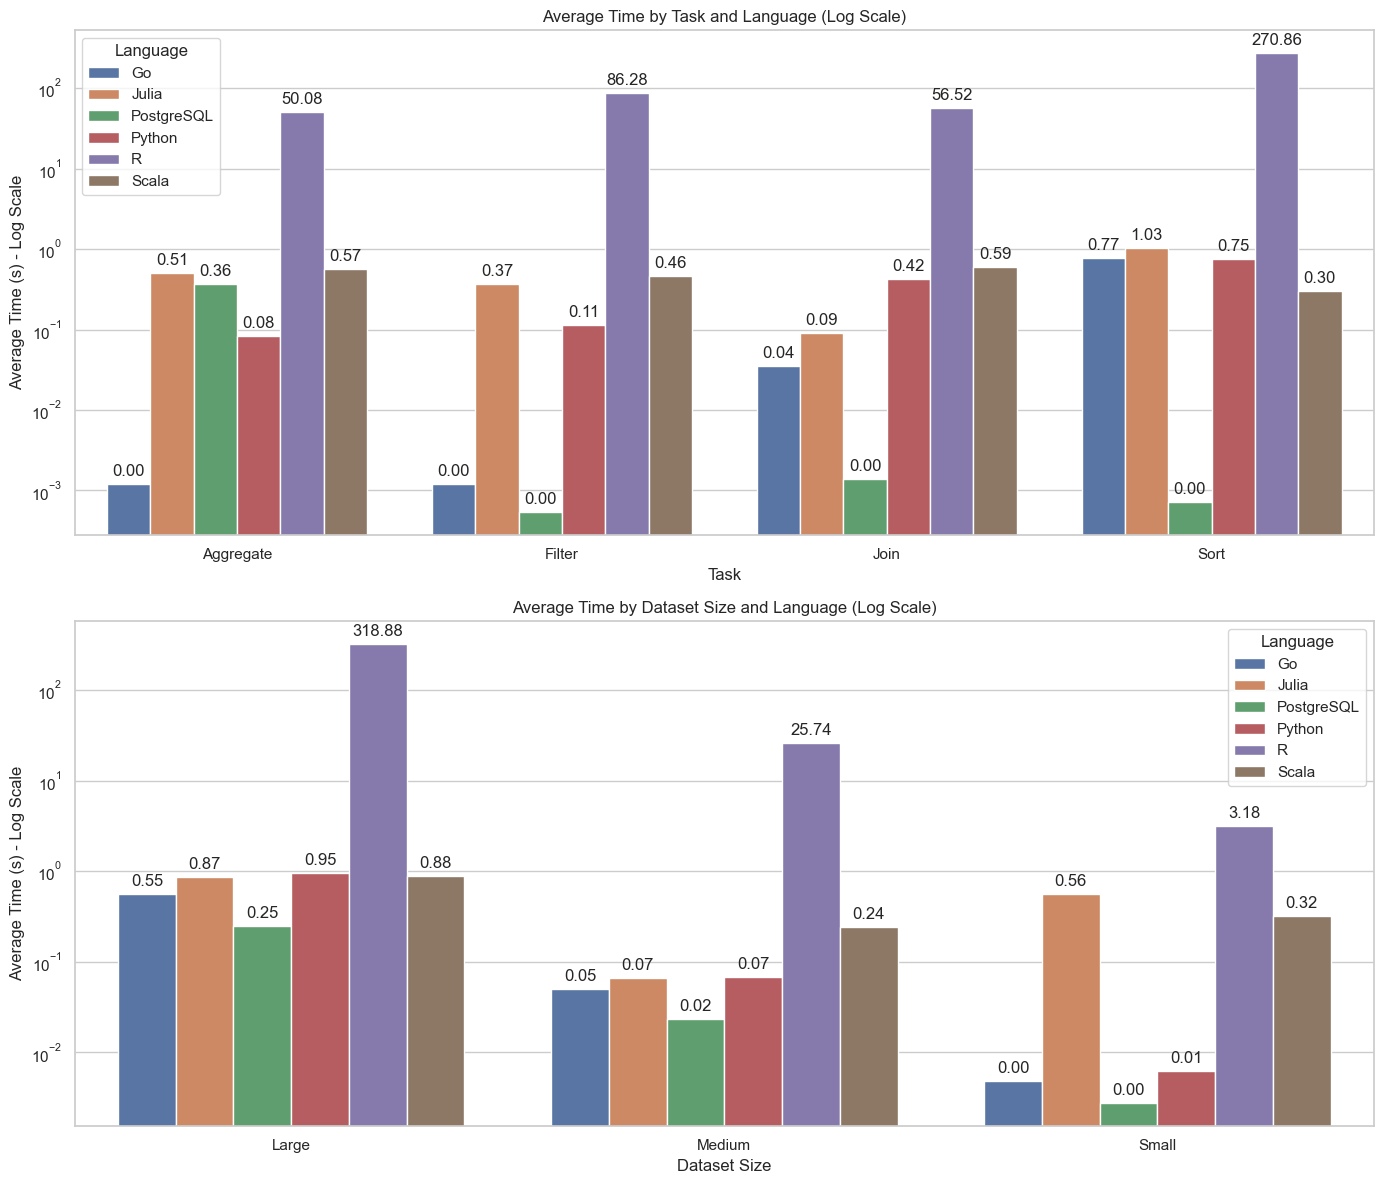

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

def add_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')


fig, axes = plt.subplots(2, 1, figsize=(14, 12))


sns.barplot(x='Task', y='Time', hue='Language', data=grouped_by_task_lang_updated, ax=axes[0])
axes[0].set_title('Average Time by Task and Language (Log Scale)')
axes[0].set_ylabel('Average Time (s) - Log Scale')
axes[0].set_yscale('log')
axes[0].set_xlabel('Task')
add_labels(axes[0])

sns.barplot(x='Size', y='Time', hue='Language', data=grouped_by_size_lang_updated, ax=axes[1])
axes[1].set_title('Average Time by Dataset Size and Language (Log Scale)')
axes[1].set_ylabel('Average Time (s) - Log Scale')
axes[1].set_yscale('log')
axes[1].set_xlabel('Dataset Size')
add_labels(axes[1])

plt.tight_layout()
plt.show()